In [1]:
import torch
import pandas as pd
import os
import sys
import numpy as np
import gym
from collections import defaultdict

dir_path = os.path.dirname(os.path.realpath('__file__'))
parent_dir = f"../src"
sys.path.insert(0, parent_dir) 

from QNetwork import QNetwork
from utils import load_trajectories, load_model, store_trajectories
from replay import play_trajectory, play_episodes

# env_name = 'MountainCar-v0'
env_name = 'LunarLander-v2'
env = gym.envs.make(env_name)
discount_factor = 0.99

dir = f"{dir_path}/../data/{env_name}"

In [2]:
df = load_trajectories(env_name)
df.sort_values('episode_length').head()

,env_name,env_params,episode_length,max_reward,seed,sum_discounted_reward,sum_reward,trajectory
720,LunarLander-v2,None,55,5.323075,720,-65.449266,-63.727995,"[([-0.0075063705, 1.4016939, -0.76032823, -0.4..."
1,LunarLander-v2,None,60,8.664488,1,-97.724016,-100.563740,"[([-0.0052567483, 1.3989172, -0.5324787, -0.53..."
88,LunarLander-v2,None,60,20.176729,88,-92.054272,-94.674112,"[([0.0063303947, 1.398324, 0.64117134, -0.5598..."
150,LunarLander-v2,None,61,7.857007,150,-54.852565,-45.194673,"[([-0.007591152, 1.4007806, -0.7689162, -0.450..."
519,LunarLander-v2,None,62,1.154052,519,-344.989097,-382.125892,"[([0.007905197, 1.4036181, 0.8006857, -0.32456..."


In [10]:
df.sort_values('sum_reward', ascending=False)

,env_name,env_params,episode_length,max_reward,seed,sum_discounted_reward,sum_reward,trajectory
759,LunarLander-v2,None,154,100.000000,759,195.239761,302.940853,"[([0.0053492547, 1.4007589, 0.54182327, -0.451..."
737,LunarLander-v2,None,172,100.000000,737,183.930818,295.866019,"[([0.0038707734, 1.3990096, 0.3920583, -0.5293..."
679,LunarLander-v2,None,222,100.000000,679,171.954076,284.894395,"[([-0.007942867, 1.4150577, -0.8045393, 0.1838..."
794,LunarLander-v2,None,221,100.000000,794,169.906501,281.703740,"[([0.006332302, 1.4100678, 0.64137053, -0.0379..."
783,LunarLander-v2,None,252,100.000000,783,150.940660,280.212653,"[([0.0019831657, 1.422152, 0.20085046, 0.49919..."
755,LunarLander-v2,None,202,100.000000,755,166.377730,279.739413,"[([0.005255699, 1.4111905, 0.5323229, 0.012009..."
661,LunarLander-v2,None,253,100.000000,661,152.604273,276.880211,"[([0.004050827, 1.4178641, 0.4102923, 0.308613..."
637,LunarLander-v2,None,264,100.000000,637,133.130432,276.426900,"[([-0.004605484, 1.4019426, -0.4664991, -0.399..."
693,LunarLander-v2,None,261,100.000000,693,132.182933,275.430619,"[([0.002216339, 1.4026682, 0.22447078, -0.3667..."
660,LunarLander-v2,None,252,100.000000,660,149.054904,275.368405,"[([0.004645729, 1.4119499, 0.47054037, 0.04576..."


In [16]:
df.iloc[[759]]

,env_name,env_params,episode_length,max_reward,seed,sum_discounted_reward,sum_reward,trajectory
759,LunarLander-v2,None,154,100.0,759,195.239761,302.940853,"[([0.0053492547, 1.4007589, 0.54182327, -0.451..."


In [5]:
episode_lengths = list(df.episode_length.sort_values())
min_len = min(episode_lengths)
max_len = max(episode_lengths)

step = (max_len - min_len) // 4
selected_trajectories = []
for val in range(min_len, max_len, step):
    closest_episode_length = min(episode_lengths, key=lambda x:abs(x - val))
    trajectory_row = df[df.episode_length == closest_episode_length].iloc[0]
    selected_trajectories.append((trajectory_row.trajectory, trajectory_row.seed))
trajectory_row = df[df.max_reward >= 200 ].iloc[0]
selected_trajectories.append((trajectory_row.trajectory, trajectory_row.seed))

store_trajectories(env_name, selected_trajectories, env_params=None, discount=discount_factor,  filename='selected_trajectories')

IndexError: single positional indexer is out-of-bounds

In [4]:
selected_trajectories = load_trajectories(env_name, filename='selected_trajectories')
print(selected_trajectories)

FileNotFoundError: [Errno 2] No such file or directory: '/home/hiryugan-ssd/Documents/rl-demostrations/src/../data/LunarLander-v2/selected_trajectories.pkl'

In [11]:
model = load_model(env_name)
model

PolynomialNetwork(
  (l1): Linear(in_features=6, out_features=3, bias=True)
)

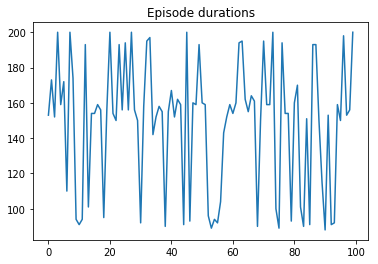

In [12]:
play_episodes(env, model, n=100, render=False)